В файле k_means_random_centers реализована стратегия выбора случайных центров, не из заданной выборки.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

Покажем, что выбор случайных центров это плохая стратегия. В 1 случае(файл k_means_random_centers) мы выберем случайные центры и во 2 случае(файл k_means_specific_sample) мы выберем центры из нашей выборки. Посчитаем среднее арифметическое итераций основного цикла нашего алгоритма, запустив его по 5 раз.

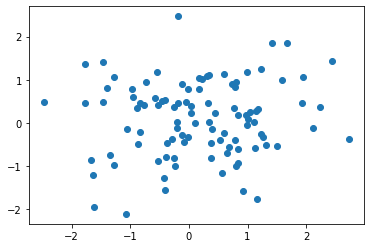

In [80]:
n = 100 #количество точек-данных
k = 5 #количество центров (сколько в конце кластеров)
data = np.random.randn(n, 2) # наши точки
plt.scatter(data[:,0], data[:, 1])

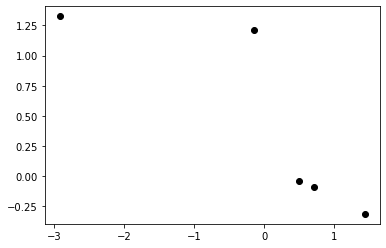

In [81]:
c = np.random.randn(k, 2) # случайные центры
plt.scatter(c[:,0], c[:, 1], color = 'k')

9


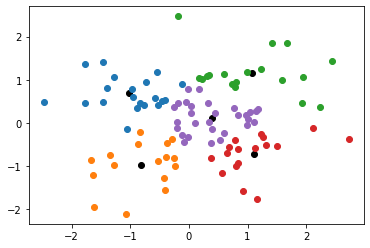

In [87]:
S = list(range(k)) # расстояние
cc = 0
cm_x = 0.0 # центр масс по x
cm_y = 0.0 # центра масс по y
cluster = np.random.randn(k, n, 2)
cm = np.random.randn(k, 2)
flag = 0 # чтобы на первом шаге не считать центр масс
flag_c = 0 # для центров
size = np.zeros(k) # размеры кластеров
while(flag_c == 0):
    if(flag == 1): # чтобы не войти на 1 шаге
        for p in range(k): # движение по кластерам
            if(size[p] == 0):
                break
            for l in range(int(size[p])): # двигаемся по элементам кластера
                cm_x = cm_x + cluster[p][l][0]
                cm_y = cm_y + cluster[p][l][1]
            c[p][0] = cm[p][0]
            c[p][1] = cm[p][1]
            cm[p][0] = cm_x / size[p] # нашли новый центр масс
            cm[p][1] = cm_y / size[p] # нашли новый центр масс
            cm_x = 0
            cm_y = 0
        flag_c = 1
        for u in range(k):
            if((c[u][0] - cm[u][0] > 0.0000001) or (c[u][1] - cm[u][1] > 0.0000001)):
                flag_c = 0
                break
        size = np.zeros(k) # так как на каждом шаге мы пересобираем кластеры, то их кол-во надо обнулять
        for i in range(n):
            for t in range(k):
                S[t] = (cm[t][0] - data[i][0]) ** 2 + (cm[t][1] - data[i][1]) ** 2
            index_cl = S.index(min(S))
            cluster[index_cl][int(size[index_cl])][0] = data[i][0]
            cluster[index_cl][int(size[index_cl])][1] = data[i][1]
            size[S.index(min(S))] += 1
    else:
        for i in range(n):
            for t in range(k):
                S[t] = (c[t][0] - data[i][0]) ** 2 + (c[t][1] - data[i][1]) ** 2
            index_cl = S.index(min(S))
            cluster[index_cl][int(size[index_cl])][0] = data[i][0]
            cluster[index_cl][int(size[index_cl])][1] = data[i][1]
            size[S.index(min(S))] += 1 #увеличиваем размер кластера
        flag = 1 
    cc += 1
print(cc)

plt.scatter(cm[:,0], cm[:, 1], color = 'k')
for i in range(k):
    plt.scatter(cluster[i][:int(size[i]), 0], cluster[i][:int(size[i]), 1])
c = np.zeros((k,2))

Считаем среднее арифметическое итераций основного цикла нашего алгоритма, запустив его 5 раз.

In [77]:
(12+8+15+15+9)/5

11.8

По результатам, в 1 случае алгоритму в среднем нужно 12 итераций, чтобы окончательно кластеризовать данные, во 2 случае алгоритму нужно 10 итераций(показано в файле k_means_specific_sample). По итогу, если выбирать центры из заданной выборки, то алгоритм будет работь эффективнее.